# IMPORTS

In [2]:
import os
import pandas as pd
import featuretools as ft
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from woodwork.logical_types import Categorical

pd.options.display.float_format = '{:.3f}'.format

# CONSTANTS

In [3]:
PARTNER_ID = 'BD01BAFAE73CF38C403978BBB458300C'

ALL_COLUMN_NAMES = ['Sale', 'SalesAmountInEuro', 'time_delay_for_conversion', 'click_timestamp',
                    'nb_clicks_1week', 'product_price', 'product_age_group', 'device_type', 'audience_id', 
                    'product_gender', 'product_brand','product_category(1)', 'product_category(2)',
                    'product_category(3)', 'product_category(4)','product_category(5)',
                    'product_category(6)', 'product_category(7)', 'product_country', 'product_id',
                    'product_title', 'partner_id', 'user_id']

CATEGORY_TYPE_COLUMN_NAMES = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand',
                       'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)',
                       'product_category(5)', 'product_category(6)', 'product_category(7)',
                       'product_country', 'product_id', 'product_title', 'user_id']

NUMERICAL_TYPE_COLUMN_NAMES = ['SalesAmountInEuro', 'time_delay_for_conversion', 'click_timestamp', 'nb_clicks_1week', 'product_price']


CSV_PATH = f"CriteoSearchData_{PARTNER_ID}.csv"

# READ CSV, PREPROCESS THE DATA

In [4]:
if os.path.isfile(CSV_PATH):
    df_raw = pd.read_csv(f"CriteoSearchData_{PARTNER_ID}.csv", low_memory=False, usecols=ALL_COLUMN_NAMES)
    df_raw.drop(labels='partner_id', inplace=True, axis=1)
else:
    print('Sorry. You have to create an appropriate csv file first.')

### nans

In [5]:
df_raw = df_raw.replace('-1', np.NaN)
df_raw.replace(-1, np.NaN, inplace=True)
df_raw.click_timestamp = pd.to_datetime(df_raw.click_timestamp, unit='s', origin='unix')
df_raw['day'] = df_raw.click_timestamp.dt.date
df_raw = df_raw.query("Sale == 1")
df_raw.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,user_id,day
7,1,119.000,457035.000,2020-08-31 18:30:51,19.000,119.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,1B491180398E2F0390E6A588B3BCE291,...,555EE90CF6686FFF818AC7065AAB2773,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,8FC90755BEDEE269D93C74762BB98050,C83584C67375245584CEBF5DCE5BEE2D 4CAC88B2214CC...,F00C3CF902EA711CEF7725BA70975496,2020-08-31
12,1,53.000,457.000,2020-09-01 00:16:08,3.000,53.000,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,NaN,1B491180398E2F0390E6A588B3BCE291,...,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E6DE04B225277BCFDFABE346CBA3F3B6,778978F5CAC64EABEE0467CE76BC0CEC BBFC4AF224D2A...,9BB0A782C760A12F5D200295D596B164,2020-09-01
35,1,178.000,101671.000,2020-08-31 19:57:39,0.000,89.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,...,8A30BF8BD2B3E9D44D2938D42C387D2E,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,218E5A741B5295FA6F638094B9C6CB48,9067248AB2A47A69ED6A6EC415733353 3DD5CA5D4ABE5...,63C0975E39531216371698EC0B371F65,2020-08-31
41,1,103.000,986.000,2020-08-31 16:18:14,1.000,103.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,8247415DCC8AE375E776F20F07617884,1B491180398E2F0390E6A588B3BCE291,...,C08050B58F54FA81F4580ECE15296698,067525A83E1875CB1828F4F9ADC752F6,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,D2E30A17A5F60F01CDA4E4F9E3437B09,02D83D1334A6C929960FC693F24445C9 59F9929C46340...,9238585AF6C8B818AD82B03FBAF80A4D,2020-08-31
52,1,173.000,585181.000,2020-08-30 23:10:47,305.000,173.000,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,...,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E8FDA53E4374F874915DFEBDBB07CC1A,F0D5D67EB388609ED73125E8258992AC 2EC1EED1871A1...,D07362B3AC1DEC11169FC194661EABBC,2020-08-30


## label encoder

In [6]:
df_raw_encoded = pd.DataFrame()
encoders = {}

for col in df_raw.columns:
    if col in CATEGORY_TYPE_COLUMN_NAMES:
        encoder = LabelEncoder()
        # filter not null values from the column
        series_not_null = df_raw[col][df_raw[col].notnull()]
        # transform the values using LabelEncoder
        df_raw_encoded[col] = pd.Series(encoder.fit_transform(series_not_null), index=series_not_null.index)
        # save the encoder
        encoders[col] = encoder
    else:
        df_raw_encoded[col] = df_raw[col]

df_raw_encoded.head(3)

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,user_id,day
7,1,119.000,457035.000,2020-08-31 18:30:51,19.000,119.000,0.000,1,NaN,0.000,...,15.000,NaN,NaN,NaN,NaN,0,1354,1412.000,2347,2020-08-31
12,1,53.000,457.000,2020-09-01 00:16:08,3.000,53.000,2.000,0,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,0,2179,804.000,1520,2020-09-01
35,1,178.000,101671.000,2020-08-31 19:57:39,0.000,89.000,0.000,1,NaN,2.000,...,27.000,NaN,NaN,NaN,NaN,0,317,1010.000,970,2020-08-31


### create categorical and numerical datasets

In [7]:
PRODUCT_INFO = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand',
                       'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)',
                       'product_category(5)', 'product_category(6)', 'product_category(7)',
                       'product_country', 'product_id', 'product_title', 'product_price']
df_products = df_raw_encoded[PRODUCT_INFO]
df_products.drop_duplicates(subset=['product_id'], inplace=True)
df_products.head()

,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,product_price
7,0.000,1,NaN,0.000,852.000,0.000,3.000,15.000,NaN,NaN,NaN,NaN,0,1354,1412.000,119.000
12,2.000,0,NaN,0.000,659.000,0.000,13.000,NaN,NaN,NaN,NaN,NaN,0,2179,804.000,53.000
35,0.000,1,NaN,2.000,396.000,0.000,6.000,27.000,NaN,NaN,NaN,NaN,0,317,1010.000,89.000
41,0.000,1,41.000,0.000,10.000,0.000,6.000,36.000,1.000,NaN,NaN,NaN,0,1995,10.000,103.000
52,1.000,1,NaN,2.000,855.000,0.000,13.000,NaN,NaN,NaN,NaN,NaN,0,2193,1796.000,173.000


In [8]:
df_days = df_raw_encoded.groupby('day').agg({'Sale': 'size',
                                     'SalesAmountInEuro': ['mean', 'sum'],
                                     'time_delay_for_conversion': ['mean', 'sum'],
                                     'product_price': ['mean', 'sum']})

df_days.columns = ['_'.join(temp).strip('_') for temp in df_days.columns.to_flat_index()]
df_days.reset_index(inplace=True)
df_days.head()

,day,Sale_size,SalesAmountInEuro_mean,SalesAmountInEuro_sum,time_delay_for_conversion_mean,time_delay_for_conversion_sum,product_price_mean,product_price_sum
0,2020-08-04,4,202.000,808.000,29177.500,116710.000,129.500,518.000
1,2020-08-05,34,139.471,4742.000,161671.353,5496826.000,124.588,4236.000
2,2020-08-06,44,184.227,8106.000,422781.591,18602390.000,120.818,5316.000
3,2020-08-07,62,102.419,6350.000,160834.161,9971718.000,94.742,5874.000
4,2020-08-08,68,116.647,7932.000,314288.765,21371636.000,93.029,6326.000


In [9]:
df_users = df_raw_encoded.groupby('user_id').agg({'Sale': 'size',
                                         'SalesAmountInEuro': ['mean', 'sum'],
                                         'time_delay_for_conversion': ['mean', 'sum'],
                                         'product_price': ['mean', 'sum']})


df_users.columns = ['_'.join(temp).strip('_') for temp in df_users.columns.to_flat_index()]
df_users.reset_index(inplace=True)
df_users.head()

,user_id,Sale_size,SalesAmountInEuro_mean,SalesAmountInEuro_sum,time_delay_for_conversion_mean,time_delay_for_conversion_sum,product_price_mean,product_price_sum
0,0,2,190.000,380.000,1643.000,3286.000,190.000,380.000
1,1,2,80.000,160.000,5496.000,10992.000,47.000,94.000
2,2,2,525.000,1050.000,702860.000,1405720.000,49.000,98.000
3,3,2,90.000,180.000,15075.000,30150.000,90.000,180.000
4,4,2,131.000,262.000,2593.000,5186.000,131.000,262.000


In [10]:
df_transactions = df_raw_encoded[['day', 'product_id', 'user_id', 'SalesAmountInEuro', 'time_delay_for_conversion',
                          'click_timestamp', 'nb_clicks_1week']]
df_transactions['transaction_id'] = np.arange(1, len(df_transactions)+1)
df_transactions.head()

,day,product_id,user_id,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,transaction_id
7,2020-08-31,1354,2347,119.000,457035.000,2020-08-31 18:30:51,19.000,1
12,2020-09-01,2179,1520,53.000,457.000,2020-09-01 00:16:08,3.000,2
35,2020-08-31,317,970,178.000,101671.000,2020-08-31 19:57:39,0.000,3
41,2020-08-31,1995,1416,103.000,986.000,2020-08-31 16:18:14,1.000,4
52,2020-08-30,2193,2021,173.000,585181.000,2020-08-30 23:10:47,305.000,5


In [11]:
df_days_products = df_raw_encoded.groupby(['day', 'product_id']).agg({'Sale': 'size', 'SalesAmountInEuro': 'sum'})

df_days_products.reset_index(inplace=True)
df_days_products.head()

,day,product_id,Sale,SalesAmountInEuro
0,2020-08-04,1068,2,580.000
1,2020-08-04,2326,2,228.000
2,2020-08-05,19,2,254.000
3,2020-08-05,32,2,178.000
4,2020-08-05,132,2,194.000


# Create EntitySet

In [16]:
es = ft.EntitySet(id=PARTNER_ID)

## Adding dataframes

In [17]:
categorical_type_columns_products = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand',
                                   'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)',
                                   'product_category(5)', 'product_category(6)', 'product_category(7)',
                                   'product_country', 'product_id', 'product_title']
categorical_type_columns_products = {column: Categorical for column in categorical_type_columns_products}

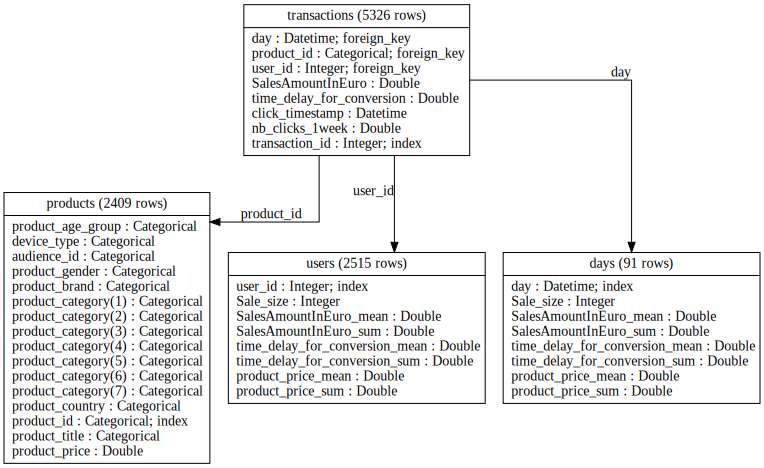

In [18]:
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df_transactions,
    index="transaction_id", # The index parameter specifies the column that uniquely identifies rows in the dataframe
    logical_types={
        "product_id": Categorical,
        "user_id": Categorical,
    }
)

es = es.add_dataframe(
    dataframe_name="products",
    dataframe=df_products,
    index="product_id",
    logical_types=categorical_type_columns_products
)

es = es.add_dataframe(
    dataframe_name="users",
    dataframe=df_users,
    index='user_id',
    logical_types={
        'user_id': Categorical,
    }
)

es = es.add_dataframe(
    dataframe_name="days",
    dataframe=df_days,
    index='day'
)

es = es.add_relationship("products", "product_id", "transactions", "product_id")
es = es.add_relationship("users", "user_id", "transactions", "user_id")
es = es.add_relationship("days", "day", "transactions", "day")

es.plot()

In [19]:
%%time
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="transactions",
                                      max_depth=3)
feature_matrix

CPU times: total: 7.59 s
Wall time: 7.66 s


,product_id,user_id,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,DAY(click_timestamp),DAY(day),MONTH(click_timestamp),MONTH(day),WEEKDAY(click_timestamp),...,days.MODE(transactions.YEAR(click_timestamp)),days.MODE(transactions.YEAR(day)),days.NUM_UNIQUE(transactions.DAY(click_timestamp)),days.NUM_UNIQUE(transactions.DAY(day)),days.NUM_UNIQUE(transactions.MONTH(click_timestamp)),days.NUM_UNIQUE(transactions.MONTH(day)),days.NUM_UNIQUE(transactions.WEEKDAY(click_timestamp)),days.NUM_UNIQUE(transactions.WEEKDAY(day)),days.NUM_UNIQUE(transactions.YEAR(click_timestamp)),days.NUM_UNIQUE(transactions.YEAR(day))
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,1354,2347,119.000,457035.000,19.000,31,31,8,8,0,...,2020,2020,1,1,1,1,1,1,1,1
2,2179,1520,53.000,457.000,3.000,1,1,9,9,1,...,2020,2020,1,1,1,1,1,1,1,1
3,317,970,178.000,101671.000,0.000,31,31,8,8,0,...,2020,2020,1,1,1,1,1,1,1,1
4,1995,1416,103.000,986.000,1.000,31,31,8,8,0,...,2020,2020,1,1,1,1,1,1,1,1
5,2193,2021,173.000,585181.000,305.000,30,30,8,8,6,...,2020,2020,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5322,1131,2073,61.000,3136.000,0.000,14,14,8,8,4,...,2020,2020,1,1,1,1,1,1,1,1
5323,1746,1013,665.000,61863.000,0.000,15,15,8,8,5,...,2020,2020,1,1,1,1,1,1,1,1
5324,1542,1528,251.000,33706.000,0.000,23,23,8,8,6,...,2020,2020,1,1,1,1,1,1,1,1
